EDA do arquivo de benefícios concedidos em fev/2020

In [11]:
# Carregando alguns módulos essenciais para trabalharmos os dados

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Algumas opções do Pandas boas para vermos muitas linhas e colunas de uma vez
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Carregando os dados
dados_benef = pd.read_csv('beneficios-concedidos-02-2020.csv',
                       sep = ";",
                       header = 0,
                       names = ['dropar', 'especie', 'cid', 'cid_1', 'despacho', 'data_nasc', 'sexo', 'clientela', 'municipio', 
                               'vinculo_depend', 'forma_filiacao', 'uf', 'qt_sal_min'], 
                       index_col = False,
                       encoding = None)

In [16]:
#Dropando a primeira coluna
dados_benef.drop(['dropar'], axis=1, inplace = True)

In [31]:
#Removendo as linhas cujas espécie não relação com Acidente de Trabalho

dados_benef = dados_benef.loc[(dados_benef['especie'] == 'Auxílio Doenca por Acidente do Trabalho')|
                              (dados_benef['especie'] == 'Aposent. Invalidez Acidente Trabalho')]

In [34]:
dados_benef.shape

(12304, 12)

In [38]:
dados_benef.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12304 entries, 137 to 391854
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   especie         12304 non-null  object
 1   cid             12304 non-null  object
 2   cid_1           12304 non-null  object
 3   despacho        12304 non-null  object
 4   data_nasc       12304 non-null  object
 5   sexo            12304 non-null  object
 6   clientela       12304 non-null  object
 7   municipio       12304 non-null  object
 8   vinculo_depend  12304 non-null  object
 9   forma_filiacao  12304 non-null  object
 10  uf              12304 non-null  object
 11  qt_sal_min      12304 non-null  object
dtypes: object(12)
memory usage: 1.2+ MB


In [49]:
#Verificando dados com valores estranhos nas colunas e marcando eles como NaN

dados_benef.municipio.value_counts(sort = True)

21504-SP-São Paulo             741
17064-RJ-Rio de Janeiro        344
03028-AM-Manaus                203
23001-DF-Brasília              179
04275-BA-Salvador              164
                              ... 
19153-RS-Putinga                 1
09047-MA-Grajaú                  1
21365-SP-Paulicéia               1
16105-PI-São Pedro do Piauí      1
11004-MG-Acaiaca                 1
Name: municipio, Length: 2324, dtype: int64

In [50]:
subst = "{ñ class}"
dados_benef.municipio.replace(subst, np.nan, inplace = True)

In [51]:
dados_benef.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12304 entries, 137 to 391854
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   especie         12304 non-null  object
 1   cid             11740 non-null  object
 2   cid_1           11740 non-null  object
 3   despacho        12304 non-null  object
 4   data_nasc       12304 non-null  object
 5   sexo            12304 non-null  object
 6   clientela       12304 non-null  object
 7   municipio       12299 non-null  object
 8   vinculo_depend  12304 non-null  object
 9   forma_filiacao  12304 non-null  object
 10  uf              12304 non-null  object
 11  qt_sal_min      12304 non-null  object
dtypes: object(12)
memory usage: 1.2+ MB


In [52]:
#Salvando o dataframe com os valores nulos marcados
dados_benef.to_csv('benef_com_NaNs.csv')

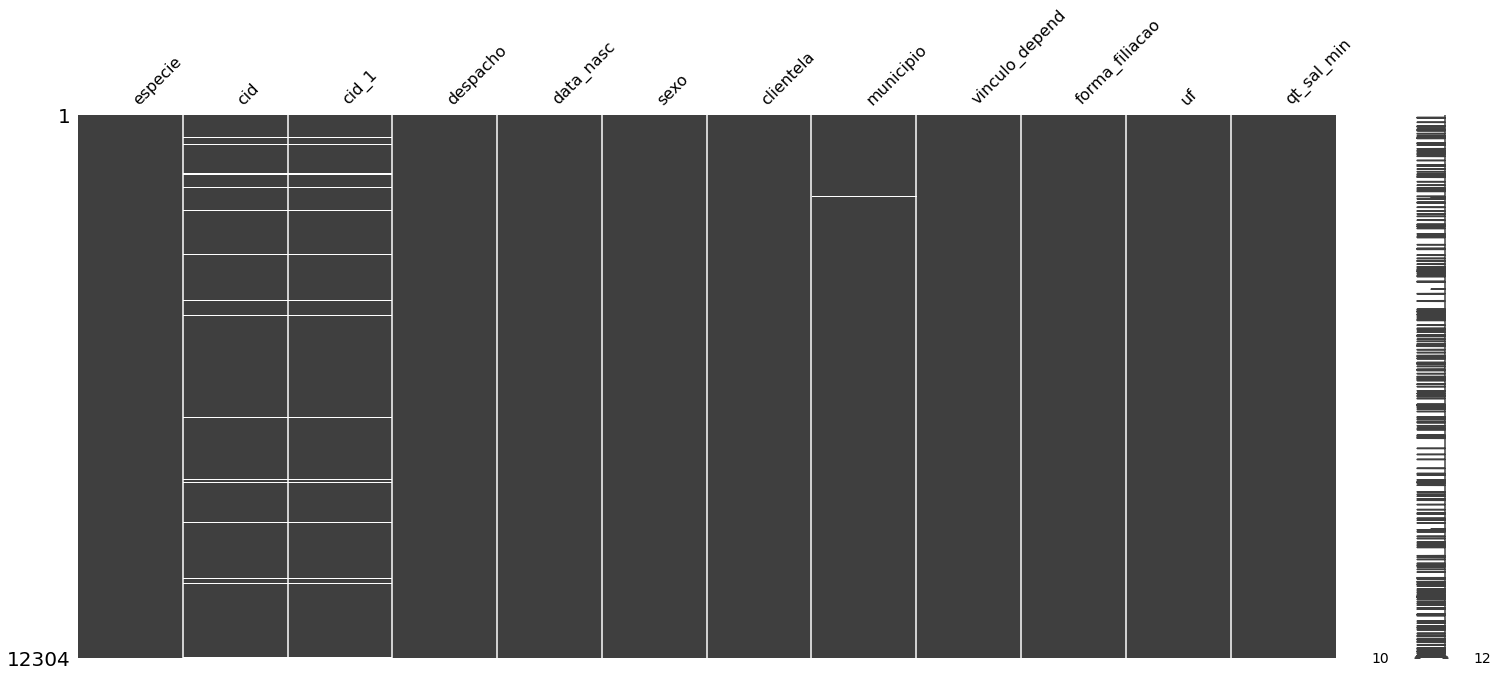

In [53]:
#Verificando a distribuição dos valores nulos

import missingno as msno
msno.matrix(dados_benef)
plt.show()

In [54]:
#Dropando as linhas com valores nulos
dados_benef = dados_benef.dropna()

In [56]:
#Salvando o dataframe sem os valores nulos
dados_benef.to_csv('benef_sem_NaNs.csv')

In [64]:
#Transformando a variável de valor do benefício em numérica

dados_benef["qt_sal_min"] = dados_benef["qt_sal_min"].str.replace(",",".")

dados_benef["qt_sal_min"] = dados_benef.qt_sal_min.astype(float)


In [69]:
#Verificando o valor mensal de benefício segunda cada CID
dados_benef.groupby(["cid"]).mean()

,qt_sal_min
cid,
A15,1.611222
A150,1.241167
A152,2.258333
A153,1.100000
A155,1.000000
A156,1.419000
A159,1.312500
A16,1.679667
A160,1.906000
